Melika Ahmadi Ranjbar 97521036


---

Homework 12

#Question 1

In [1]:
# Install
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf

# Import
import numpy as np
import pandas as pd
from keras import layers
import matplotlib.pyplot as plt
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler

     |████████████████████████████████| 6.4 MB 7.3 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [2]:
# Get Data
TrainData = yf.download("BTC-USD", start="2014-01-01", end="2021-09-01")['Adj Close']
TestData = yf.download("BTC-USD", start="2021-09-01")['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


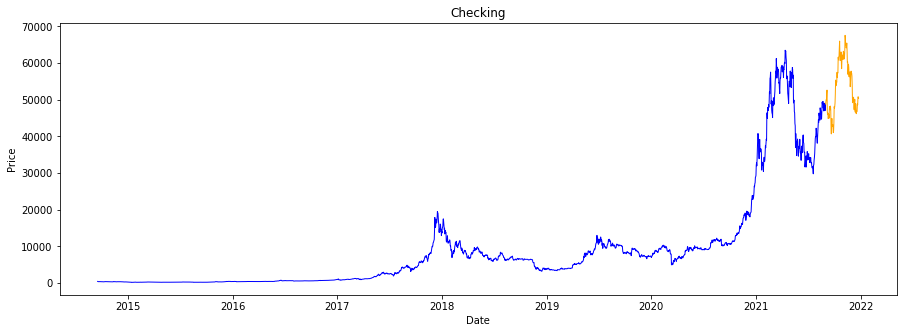

In [3]:
# Plot
plt.figure(figsize=(15, 5))
plt.plot(TrainData, color='blue', linewidth=1)
plt.plot(TestData, color='orange', linewidth=1)
plt.title('Checking')
plt.ylabel('Price')
plt.xlabel('Date')
plt.show()

In [4]:
# Normalize
TrainData = np.array(TrainData).reshape(-1, 1)
TestData = np.array(TestData).reshape(-1, 1)

Scaler = MinMaxScaler()
Scaler.fit(TrainData)
TrainData = Scaler.transform(TrainData)
TestData = Scaler.transform(TestData)

In [5]:
RangeNumber = 60

def CreateRangedDataSet(Data):
    x = []
    y = []
    for i in range(RangeNumber, Data.shape[0]):
        x.append(Data[i - RangeNumber: i, 0])
        y.append(Data[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x, y

XTrain, YTrain = CreateRangedDataSet(TrainData)
XTest, YTest = CreateRangedDataSet(TestData)

# Reshape
XTrain = np.reshape(XTrain, (XTrain.shape[0], XTrain.shape[1], 1))
XTest = np.reshape(XTest, (XTest.shape[0], XTest.shape[1], 1))

# Print
print(XTrain.shape)
print(YTrain.shape)
print(XTest.shape)

(2482, 60, 1)
(2482,)
(56, 60, 1)


In [6]:
Loss = "mse"
Optimizer = "Adam"

def CreateModel():
    Model = Sequential()
    Model.add(layers.LSTM(units=50, return_sequences=True, input_shape=(XTrain.shape[1], 1)))
    Model.add(layers.Dropout(0.2))
    Model.add(layers.LSTM(units=50,return_sequences=True))
    Model.add(layers.Dropout(0.2))
    Model.add(layers.LSTM(units=50,return_sequences=True))
    Model.add(layers.Dropout(0.2))
    Model.add(layers.LSTM(units=50))
    Model.add(layers.Dropout(0.2))
    Model.add(layers.Dense(units=1))

    Model.compile(optimizer=Optimizer, loss=Loss)
    return Model

In [7]:
# Train
Model = CreateModel()

Epochs = 100
BatchSize = 32
Model.fit(XTrain, YTrain, epochs=Epochs, batch_size=BatchSize)

Epoch 1/100
78/78 [==============================] - 16s 63ms/step - loss: 0.0051
Epoch 2/100
78/78 [==============================] - 5s 63ms/step - loss: 0.0020
Epoch 3/100
78/78 [==============================] - 5s 63ms/step - loss: 0.0022
Epoch 4/100
78/78 [==============================] - 5s 63ms/step - loss: 0.0019
Epoch 5/100
78/78 [==============================] - 5s 63ms/step - loss: 0.0016
Epoch 6/100
78/78 [==============================] - 5s 63ms/step - loss: 0.0014
Epoch 7/100
78/78 [==============================] - 5s 63ms/step - loss: 0.0016
Epoch 8/100
78/78 [==============================] - 5s 62ms/step - loss: 0.0016
Epoch 9/100
78/78 [==============================] - 5s 63ms/step - loss: 0.0014
Epoch 10/100
78/78 [==============================] - 5s 63ms/step - loss: 0.0012
Epoch 11/100
78/78 [==============================] - 5s 63ms/step - loss: 0.0013
Epoch 12/100
78/78 [==============================] - 5s 63ms/step - loss: 0.0011
Epoch 13/100
78/78 [====

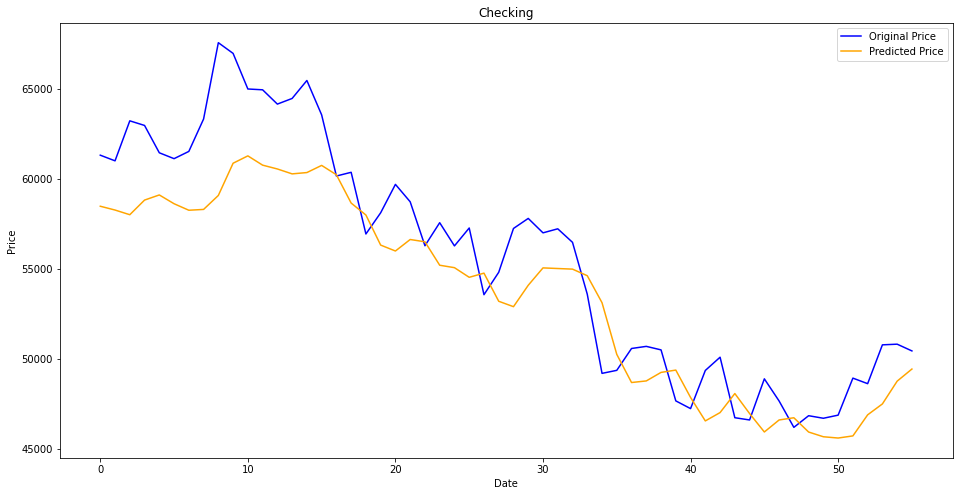

In [9]:
Prediction = Model.predict(XTest)
Prediction = Scaler.inverse_transform(Prediction)
YTestScaled = Scaler.inverse_transform(YTest.reshape(-1, 1))

fig = plt.subplots(figsize=(16,8))
plt.plot(YTestScaled, color='blue', label='Original Price')
plt.plot(Prediction, color='orange', label='Predicted Price')
plt.title('Checking')
plt.ylabel('Price')
plt.xlabel('Date')
plt.legend()


#Question 2


In [24]:
# Variables
OptimizerSecond = "Adam"
LossSecond = "categorical_crossentropy"
EpochSecond = 5
BatchSecond = 32

# Space Included 
Alphabets = " abcdefghijklmnopqrstuvwxyz" 

In [25]:
# Get Data
File = open("enc-dec.txt")
Content = File.read()
ContentList = Content.split("\n")

XTrainSecond = np.zeros((len(ContentList), 10, len(Alphabets)))
YTrainSecond = np.zeros((len(ContentList), 10, len(Alphabets)))

for I in range(len(ContentList)):
    TempX = ContentList[I].split("\t")[0]
    TempY = ContentList[I].split("\t")[1]
    # Add Space To The End Of The Words
    if len(TempX) < 10:
        TempX += (10 - len(TempX)) * ' '
    if len(TempY) < 10:
        TempY += (10 - len(TempY)) * ' '

    # Coding The Arrays!
    for J in range(10):
        XTrainSecond[I, J, Alphabets.find(TempX[J])] = 1
        YTrainSecond[I, J, Alphabets.find(TempY[J])] = 1
# We Noe Have The Data

In [26]:
# We Have To Repeat What We Did For The Test Data As Well
TestDataSecond = "onmltsrqpoihgrezcba lknrvjihgfueiizltflk"
TenChars = []
for I in range(0, len(TestDataSecond), 10): 
    TenChars.append(TestDataSecond[I:I + 10])

XTestSecond = np.zeros((len(TenChars), 10, len(Alphabets)))

for I in range(len(TenChars)):
    for J in range(10):
        XTestSecond[I, J, Alphabets.find(TenChars[I][J])] = 1

In [36]:
def CreateSecondModel():
    Model = Sequential()
    Model.add(layers.GRU(units=256, input_shape=(XTrainSecond[0].shape)))
    Model.add(layers.RepeatVector(10))
    Model.add(layers.GRU(units=256, return_sequences=True))
    Model.add(layers.GRU(units=256, return_sequences=True))
    Model.add(layers.Dense(units=len(Alphabets)))

    Model.compile(optimizer=Optimizer, loss=Loss, metrics=['accuracy'])
    return Model

In [38]:
# Train
ModelSecond = CreateSecondModel()
ModelSecond.fit(XTrainSecond, YTrainSecond, BatchSecond, EpochSecond)


Epoch 1/5
4759/4759 [==============================] - 97s 19ms/step - loss: 0.0234 - accuracy: 0.4791
Epoch 2/5
4759/4759 [==============================] - 89s 19ms/step - loss: 0.0082 - accuracy: 0.8626
Epoch 3/5
4759/4759 [==============================] - 89s 19ms/step - loss: 0.0043 - accuracy: 0.9287
Epoch 4/5
4759/4759 [==============================] - 89s 19ms/step - loss: 0.0033 - accuracy: 0.9431
Epoch 5/5
4759/4759 [==============================] - 90s 19ms/step - loss: 0.0028 - accuracy: 0.9499


In [40]:
# Test & See The Answer
Preds = ModelSecond.predict(XTestSecond)
Decrypted = ""
for i in range(Preds.shape[0]):
    for j in range(Preds.shape[1]):
        Decrypted += Alphabets[np.argmax(Preds[i, j])]
        
print(Decrypted)

    i        love     deep    olearding 


In [43]:
def CreateSecondModelPrime():
    Model = Sequential()
    Model.add(layers.GRU(units=128, input_shape=(XTrainSecond[0].shape)))
    Model.add(layers.RepeatVector(10))
    Model.add(layers.GRU(units=256, return_sequences=True))
    Model.add(layers.GRU(units=512, return_sequences=True))
    Model.add(layers.Dense(units=len(Alphabets)))

    Model.compile(optimizer=Optimizer, loss=Loss, metrics=['accuracy'])
    return Model

In [44]:
# Train
ModelSecondPrime = CreateSecondModelPrime()
ModelSecondPrime.fit(XTrainSecond, YTrainSecond, BatchSecond, EpochSecond)


Epoch 1/5
4759/4759 [==============================] - 104s 21ms/step - loss: 0.0248 - accuracy: 0.4338
Epoch 2/5
4759/4759 [==============================] - 98s 21ms/step - loss: 0.0120 - accuracy: 0.7756
Epoch 3/5
4759/4759 [==============================] - 99s 21ms/step - loss: 0.0061 - accuracy: 0.8990
Epoch 4/5
4759/4759 [==============================] - 99s 21ms/step - loss: 0.0041 - accuracy: 0.9325
Epoch 5/5
4759/4759 [==============================] - 99s 21ms/step - loss: 0.0033 - accuracy: 0.9443


In [45]:
# Test & See The Answer
Preds = ModelSecondPrime.predict(XTestSecond)
Decrypted = ""
for i in range(Preds.shape[0]):
    for j in range(Preds.shape[1]):
        Decrypted += Alphabets[np.argmax(Preds[i, j])]
        
print(Decrypted)

    ic       love   s deep    plearning 
